## Aircraft Energy Optimization Simulation

### Workflow
- Define Aircraft
- Set runway speed, initial pitch, and initial altitude
- Simulation Loop
- Output flight path

### Import Libraries

In [ ]:
from math import sin, cos, radians
import numpy as np 

### Airplane Variables

In [75]:
class Aircraft:
    def __init__(self, mass, wing_area, thrust, drag_coefficient, lift_coefficient, lift_angle):
        self.mass = mass  # in Kg
        self.wing_area = wing_area  # in square meters
        self.thrust = thrust  # in Newtons
        self.drag_coefficient = drag_coefficient  # dimensionless
        self.lift_coefficient = lift_coefficient  # dimensionless
        self.lift_angle = radians(lift_angle)  # in degrees


### Force Formulas

In [76]:
class Forces:
    @staticmethod
    def lift(aircraft, air_density, velocity):
        return 0.5 * air_density * pow(velocity, 2) * aircraft.wing_area * aircraft.lift_coefficient

    @staticmethod
    def drag(aircraft, air_density, velocity):
        return ((air_density * velocity**2)/2) * aircraft.wing_area * aircraft.drag_coefficient

    @staticmethod
    def weight(aircraft):
        return aircraft.mass * 9.81  # Convert kg to Newtons

    @staticmethod
    def thrust(aircraft):
        return aircraft.thrust

### Acceleration function based on lift angle

In [77]:
from math import sin, cos, radians

def compute_acceleration(aircraft, air_density, velocity):
    
    angle_rad = radians(aircraft.lift_angle)  # convert degrees → radians

    # Forces
    thrust_force = Forces.thrust(aircraft)
    drag_force   = Forces.drag(aircraft, air_density, velocity)
    lift_force   = Forces.lift(aircraft, air_density, velocity)
    weight_force = Forces.weight(aircraft)

    # Acceleration components
    a_y = (thrust_force * sin(angle_rad) - drag_force * sin(angle_rad) + lift_force * cos(angle_rad) - weight_force) / aircraft.mass

    a_x = (thrust_force * cos(angle_rad) - drag_force * cos(angle_rad) - lift_force * sin(angle_rad)) / aircraft.mass

    return (pow(a_x, 2) +  pow(a_y, 2))**0.5

def compute_acceleration_x(aircraft, air_density, velocity):
    
    angle_rad = aircraft.lift_angle 

    # Forces
    thrust_force = Forces.thrust(aircraft)
    drag_force   = Forces.drag(aircraft, air_density, velocity)
    lift_force   = Forces.lift(aircraft, air_density, velocity)
    weight_force = Forces.weight(aircraft)

    # Acceleration components
    a_y = (thrust_force * sin(angle_rad) - drag_force * sin(angle_rad) + lift_force * cos(angle_rad) - weight_force) / aircraft.mass

    a_x = (thrust_force * cos(angle_rad) - drag_force * cos(angle_rad) - lift_force * sin(angle_rad)) / aircraft.mass

    return a_x



### Base Variables for Simulation

In [79]:
air_density = 1.225  # kg/m^3 at sea level
initial_velocity = 0  # m/s
time_step = 0.01  # seconds
total_time = 10  # seconds


### Simulation

In [80]:
# Initialize arrays
n_steps = int(total_time / time_step)
velocity = np.zeros(n_steps)
acceleration = np.zeros(n_steps)
acceleration_x = np.zeros(n_steps)
acceleration_z = np.zeros(n_steps)
distance_x = np.zeros(n_steps)
distance_z = np.zeros(n_steps)

# Set initial conditions
plane = Aircraft(
    mass=66678.08,
    wing_area=122.6,
    thrust=240000,
    drag_coefficient=0.03,
    lift_coefficient=1.6,
    lift_angle=0  
)

velocity[0] = initial_velocity
distance_x[0] = 0
distance_z[0] = 0

t_pitch = 3.0       # seconds to reach max pitch
theta_max = 20       # max pitch angle in degrees
v_max = 77.6         # max velocity cap in m/s

for i in range(n_steps):
    t = i * time_step
    
    # Dynamic lift angle
    plane.lift_angle = min(theta_max, theta_max * t / t_pitch)
    angle_rad = np.radians(plane.lift_angle)
    
    # Compute total acceleration
    acceleration[i] = compute_acceleration(plane, air_density, velocity[i-1])
    
    # Split into components
    acceleration_x[i] = acceleration[i] * np.cos(angle_rad)
    acceleration_z[i] = acceleration[i] * np.sin(angle_rad)
    
    if i > 0:
        # Update velocity with cap
        new_velocity = velocity[i-1] + acceleration[i] * time_step
        velocity[i] = min(new_velocity, v_max)
        
        # Update positions using capped velocity
        distance_x[i] = distance_x[i-1] + velocity[i] * np.cos(angle_rad) * time_step
        distance_z[i] = distance_z[i-1] + velocity[i] * np.sin(angle_rad) * time_step

print("Horizontal distance:", distance_x)
print("Vertical distance:", distance_z)
print("Horizontal acceleration:", acceleration_x)
print("Vertical acceleration:", acceleration_z)


Horizontal distance: [0.00000000e+00 1.04455419e-03 3.13326308e-03 6.26571904e-03
 1.04415064e-02 1.56602013e-02 2.19213719e-02 2.92245782e-02
 3.75693722e-02 4.69552976e-02 5.73818903e-02 6.88486780e-02
 8.13551803e-02 9.49009088e-02 1.09485367e-01 1.25108051e-01
 1.41768447e-01 1.59466035e-01 1.78200287e-01 1.97970666e-01
 2.18776627e-01 2.40617617e-01 2.63493077e-01 2.87402436e-01
 3.12345119e-01 3.38320542e-01 3.65328110e-01 3.93367224e-01
 4.22437276e-01 4.52537648e-01 4.83667716e-01 5.15826848e-01
 5.49014404e-01 5.83229735e-01 6.18472186e-01 6.54741091e-01
 6.92035780e-01 7.30355573e-01 7.69699781e-01 8.10067709e-01
 8.51458654e-01 8.93871905e-01 9.37306742e-01 9.81762438e-01
 1.02723826e+00 1.07373346e+00 1.12124730e+00 1.16977900e+00
 1.21932782e+00 1.26989297e+00 1.32147367e+00 1.37406914e+00
 1.42767857e+00 1.48230116e+00 1.53793610e+00 1.59458257e+00
 1.65223975e+00 1.71090678e+00 1.77058284e+00 1.83126708e+00
 1.89295862e+00 1.95565661e+00 2.01936018e+00 2.08406843e+00
 2.

### Plot Results

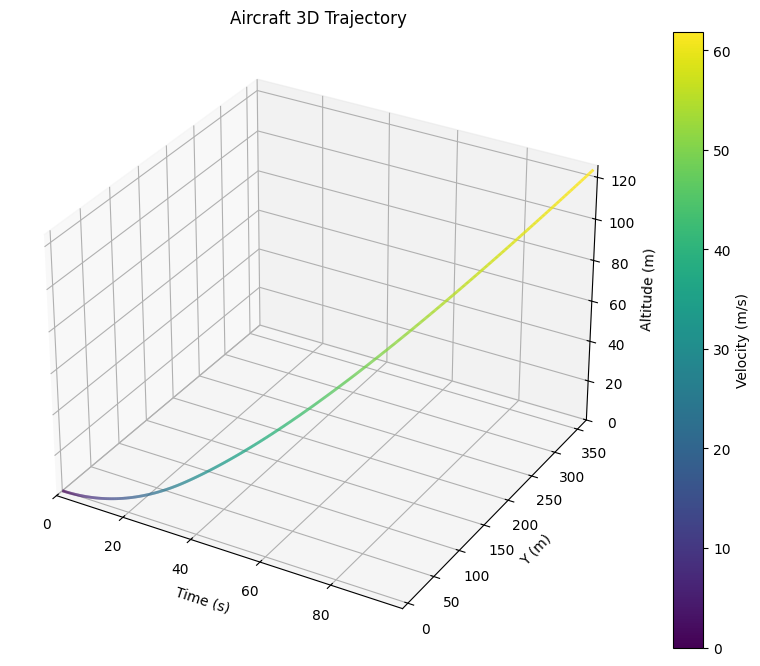

In [81]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d.art3d import Line3DCollection
import numpy as np


x = np.arange(n_steps) * 0.1       # horizontal distance or time (adjust as needed)
y = distance_x                      # optional lateral motion
z = distance_z                      # vertical axis
velocity_color = velocity            # color by velocity


fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(min(x), max(x))
ax.set_ylim(min(y)-10, max(y)+10)
ax.set_zlim(min(z), max(z))
ax.set_xlabel('Time (s)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Altitude (m)')
ax.set_title('Aircraft 3D Trajectory')


points = np.array([x, y, z]).T.reshape(-1,1,3)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
lc = Line3DCollection(segments, cmap='viridis', linewidth=2)
lc.set_array(velocity_color[:-1])
ax.add_collection(lc)
fig.colorbar(lc, ax=ax, label='Velocity (m/s)')


def update(frame):
    lc.set_segments(segments[:frame])
    lc.set_array(velocity_color[:frame])
    return lc,

ani = FuncAnimation(fig, update, frames=n_steps, interval=50, blit=False)
plt.show()
